# Import Library

In [ ]:
!pip uninstall -y -q tensorflow

In [ ]:
import torch
torch.autograd.set_detect_anomaly(True)

print('pytorch version', torch.__version__)
print("GPU available:", torch.cuda.device_count())
#print('GPU name:',torch.cuda.get_device_name(0))

# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pytorch version 2.5.1+cu121
GPU available: 1


In [ ]:
import transformers

# For Model
from transformers import PatchTSMixerConfig, PatchTSMixerModel, PatchTSMixerForPrediction, PatchTSMixerForPrediction, PatchTSMixerForRegression

# For TPU
from transformers import set_seed
from torch.optim import AdamW

In [ ]:
!pip install -q datasets #==2.10.0

In [ ]:
# For Data Loaders
import datasets
from torch.utils.data import Dataset, DataLoader

In [ ]:
# For Display
from tqdm.notebook import tqdm

# For GPU
from accelerate import Accelerator, notebook_launcher

In [ ]:
#import kagglehub
import random
import os
import gc
from glob import glob
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]

In [ ]:
from sklearn.model_selection import train_test_split

# Global Constants

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import userdata
secret_token_hf = userdata.get('HF_TOKEN')

In [ ]:
gdrive_code_path = '/content/drive/MyDrive/MyColabProject/Code/InProgress/granite'
gdrive_data_path = '/content/drive/MyDrive/MyColabProject/Data'
gdrive_model_path = '/content/drive/MyDrive/MyColabProject/Models/granite'

In [ ]:
BATCH_SIZE = 256
print('BATCH_SIZE =',BATCH_SIZE)

BUFFER_SIZE = BATCH_SIZE * 8
print('BUFFER_SIZE =',BUFFER_SIZE)

MODEL_TRANSFORMER = 'ibm-granite/granite-timeseries-ttm-r2'

CONTEXT_LENGTH = 32
PREDICTION_LENGTH = 1

In [ ]:
def seed_everything(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    transformers.set_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
seed_everything(42)

# Import Data

# Train Test Split

In [ ]:
train_path, val_path, train_label, val_label = train_test_split(video_path, labels_int, test_size=0.2, stratify=labels_text, random_state=42)
train_path, test_path, train_label, test_label = train_test_split(train_path, train_label, test_size=0.2, stratify=train_label, random_state=42)

In [ ]:
print('Train data size:',len(train_path))
print('Val data size:',len(val_path))
print('Test data size:',len(test_path))

Train data size: 390
Val data size: 122
Test data size: 98


In [ ]:
train_label[:5]

[8, 30, 24, 27, 17]

# Validating the input data - NOT USED

In [ ]:
#idx = 2
#train_path[idx]

In [ ]:
#vr_demo = VideoReader(train_path[idx])#, width=CLIP_WIDTH, height=CLIP_HEIGHT)

In [ ]:
#print('Number of Fames in the video:',len(vr_demo))

In [ ]:
#frame = vr_demo[1]
#print('Shape of the frame:',frame.shape)

In [ ]:
#key_indices = vr_demo.get_key_indices()
#key_frames = vr_demo.get_batch(key_indices)
#print(key_frames.shape)

In [ ]:
#print(key_frames.permute(0, 3, 1, 2).shape)

In [ ]:
#image_processor_demo = VivitImageProcessor.from_pretrained(MODEL_TRANSFORMER,
#                                                           size={'width':CLIP_WIDTH, 'height':CLIP_HEIGHT},
#                                                           crop_size={'width':CLIP_WIDTH, 'height':CLIP_HEIGHT}
#                                                           )

In [ ]:
#model_inputs_demo = image_processor_demo.preprocess(videos=list(key_frames),
#                                               return_tensors='pt',
#                                               input_data_format='channels_last', # image in (height, width, num_channels) format.
#                                               )

In [ ]:
#print(model_inputs_demo.pixel_values.shape)

In [ ]:
#reshaped_video = model_inputs_demo.pixel_values[0].permute(0, 2, 3, 1)

In [ ]:
#plt.imshow(reshaped_video[0])

In [ ]:
#sample_input = model_inputs_demo.pixel_values[0]
#
## Define original dimensions
#height =  sample_input.shape[2]
#width = sample_input.shape[3]
#
## Define the crop factor
#target_height = height - (height // 10) # Crop 10% of the height
#target_width =  width - (width // 2) # Crop 50% of width
#
## Define (Offset) the amount of crop required at each side of the image
#offset_height = (height - target_height) // 2
#offset_width = (width - target_width) // 2

In [ ]:
#sample_out = transforms.v2.functional.crop(sample_input, offset_height, offset_width, target_height, target_width)

In [ ]:
#print(sample_input.shape)
#print(sample_out.shape)

In [ ]:
#reshaped_video = sample_out.permute(0, 2, 3, 1)

In [ ]:
#plt.imshow(reshaped_video[0])

In [ ]:
## Define a sample transformation pipeline
#transform_demo = transforms.Compose([
#    #transforms.RandomHorizontalFlip(),
#    #transforms.RandomVerticalFlip(),
#    #transforms.RandomResizedCrop(size=(640, 480), scale=(0.5, 1)),  # Zoom and crop # (1080, 1920)
#    transforms.v2.Resize((224, 224)),
#    transforms.v2.RandomPerspective(),
#    #transforms.v2.ColorJitter(brightness=(0.2, 0.8), contrast=(0.2, 0.8), saturation=(0.2, 0.8), hue=(-0.2, 0.2)),
#    transforms.v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
#    #transforms.v2.ColorJitter(),
#    #transforms.v2.RandomRotation(15),
#    #transforms.v2.ToImage(),
#    transforms.v2.ToDtype(torch.float32, scale=True)
#])

In [ ]:
#selected_video = sample_out
#print(len(selected_video))
#print(selected_video.shape)

In [ ]:
#augmented_video = transform_demo(selected_video)

In [ ]:
#print(augmented_video.shape)

In [ ]:
#plt.imshow(augmented_video[4].permute(1, 2, 0))

In [ ]:
#print(augmented_video.max())
#print(augmented_video.min())

In [ ]:
#plt.imshow(key_frames[0])

# Create Dataset

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
image_processor = VivitImageProcessor.from_pretrained(MODEL_TRANSFORMER)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, pixel_values, labels):
        self.labels = labels.to('cpu')
        self.pixel_values = pixel_values.to('cpu')

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        item = {
            'labels': self.labels[idx],
            'pixel_values': self.pixel_values[idx],
        }
        return item

In [ ]:
class CreateDataset():
    def __init__(self, clip_length, image_processor):
        super().__init__()
        self.clip_length = clip_length
        self.image_processor = image_processor
        # Define a transformation pipeline
        self.transform_train = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.RandomPerspective(),
                                    transforms.v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.05),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

    def create_dataset(self, video_paths, labels, training=True):
        pixel_values = []

        for path in tqdm(video_paths):
            # Read and process Videos
            vr = VideoReader(path)
            video = vr.get_batch(list(range(len(vr))))
            video = video[:self.clip_length]

            if training:
                # Data Preperation for ML model with Augmentation
                video = self.transform_train(video.permute(0, 3, 1, 2))
            else:
                # Data Preperation for ML Model without Augmentation
                video = transforms.v2.functional.to_dtype(video.permute(0, 3, 1, 2), torch.uint8, scale=False)

            # Scaling the video to ML model's desired format
            video = self.image_processor(list(video), return_tensors='pt', input_data_format='channels_first')

            #print('Stage 4',video.shape)
            #pixel_values.append(torch.tensor(video['pixel_values'], dtype=torch.float32).squeeze(0))
            pixel_values.append(video['pixel_values'].squeeze(0))

            # Force garbage collection
            del vr, video
            gc.collect()

        pixel_values = torch.stack(pixel_values)
        labels = torch.tensor(labels, dtype=torch.uint8)

        return CustomDataset(pixel_values=pixel_values,
                             labels=labels)

In [ ]:
dataset_obj = CreateDataset(CLIP_LENGTH, image_processor)

# Testing the custome image processing class

In [ ]:
train_ds = dataset_obj.create_dataset(train_path[:2], train_label[:2], training=True)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
#del train_ds
#torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/2 [00:00<?, ?it/s]

18

In [ ]:
inputs = next(iter(train_dl))
print(inputs['pixel_values'].shape, inputs['labels'].shape)

torch.Size([2, 32, 3, 224, 224]) torch.Size([2])


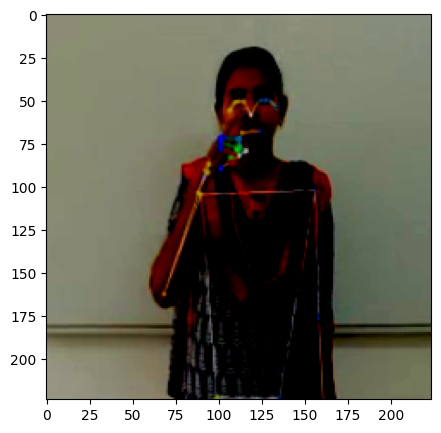

In [ ]:
plt.imshow(inputs['pixel_values'][0,22].cpu().permute(1, 2, 0))

In [ ]:
print(inputs['pixel_values'].min())
print(inputs['pixel_values'].max())

tensor(-0.9216)
tensor(0.8745)


In [ ]:
val_ds = dataset_obj.create_dataset(val_path[:2], val_label[:2], training=False)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
del val_ds
torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/2 [00:00<?, ?it/s]

18

In [ ]:
# Example usage
inputs = next(iter(val_dl))
print(inputs['pixel_values'].shape, inputs['labels'].shape)

torch.Size([2, 32, 3, 224, 224]) torch.Size([2])


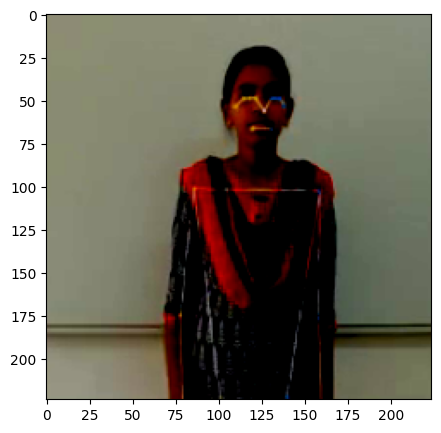

In [ ]:
plt.imshow(inputs['pixel_values'][0,7].cpu().permute(1, 2, 0))

In [ ]:
print(inputs['pixel_values'].min())
print(inputs['pixel_values'].max())

tensor(-0.9843)
tensor(1.)


# Creating DataLoader

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
train_ds = dataset_obj.create_dataset(train_path, train_label, training=True)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
#del train_ds
#torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/390 [00:00<?, ?it/s]

17

In [ ]:
val_ds = dataset_obj.create_dataset(val_path, val_label, training=False)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
#del val_ds
#torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/122 [00:00<?, ?it/s]

17

# Model Training

In [ ]:
#config_demo = VivitConfig.from_pretrained(MODEL_TRANSFORMER, id2label=idx_to_label)
#model_transformer = VivitForVideoClassification.from_pretrained(MODEL_TRANSFORMER, return_dict=True)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
hyperparameters = {
    "learning_rate": 0.0001,
    "num_epochs": 1000, # set to very high number
    "seed": 42,
    "patience": 10, # early stopping
    "output_dir_pt": f"{gdrive_path}/vivit_pytorch_GPU_3",
    "output_dir_transformer": f"{gdrive_path}/vivit_pytorch_transformer_GPU_3",
    'dropout_rate': 0.3
}


In [ ]:
# Initialize TensorBoard writer
#writer = SummaryWriter(log_dir='runs/experiment_1')  # Path to where logs will be saved

# Now we train the model
def training_function():
    # Initialize accelerator
    accelerator = Accelerator()#(fp16=True)

    # To have only one message (and not 8) per logs of Transformers or Datasets, we set the logging verbosity
    # to INFO for the main process only.
    if accelerator.is_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()

    # The seed need to be set before we instantiate the model, as it will determine the random head.
    set_seed(hyperparameters["seed"])

    # Instantiate the model, chnage the final classification layer, let Accelerate handle the device placement.
    config = VivitConfig.from_pretrained(MODEL_TRANSFORMER, id2label=idx_to_label,
                                         label2id=label_to_idx, num_labels=len(classes),
                                         return_dict=True, #hidden_dropout_prob=hyperparameters['dropout_rate'],
                                         #attention_probs_dropout_prob=hyperparameters['dropout_rate'],
                                         #interpolate_pos_encoding=True,
                                         #image_size=CLIP_SIZE,
                                         #num_frames=CLIP_LENGTH,
                                         #num_attention_heads=1,
                                         #num_hidden_layers=2,
                                         #intermediate_size=64,
                                         #hidden_size=32,
                                         #hidden_act='relu',
                                         #tubelet_size=[4, 16, 16]
                                         )
    model_transformer = VivitForVideoClassification.from_pretrained(MODEL_TRANSFORMER, config=config, ignore_mismatched_sizes=True) # MODEL_TRANSFORMER

    # Freeze the backbone
    #for param in model_transformer.vivit.parameters():
    #  param.requires_grad = False

    # Additional layers
    #sequential_final = torch.nn.Sequential(torch.nn.Linear(model_transformer.config.hidden_size, model_transformer.config.hidden_size//2),
    #                                 torch.nn.ReLU(),
    #                                 torch.nn.Dropout(hyperparameters['dropout_rate']),
    #                                 torch.nn.Linear(model_transformer.config.hidden_size//2, model_transformer.config.hidden_size//4),
    #                                 torch.nn.ReLU(),
    #                                 torch.nn.Dropout(hyperparameters['dropout_rate']),
    #                                 torch.nn.Linear(model_transformer.config.hidden_size//4, len(classes))
    #                                 )
    #
    #model_transformer.classifier = sequential_final

    # Final Classification Layer
    model_transformer.classifier = torch.nn.Linear(model_transformer.config.hidden_size, len(classes))

    #torch.nn.init.xavier_uniform_(model_transformer.classifier.weight)
    #torch.nn.init.zeros_(model_transformer.classifier.bias)

    model_transformer.gradient_checkpointing_enable()

    # Loss function
    #criterion = torch.nn.CrossEntropyLoss()

    # Instantiate optimizer
    optimizer = AdamW(model_transformer.parameters(), lr=hyperparameters["learning_rate"])

    # Define the learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2, verbose=True, min_lr=0.00001
    )

    # There is no specific order to remember, we just need to unpack the objects in the same order we gave them to the
    # prepare method.
    accelerated_model, acclerated_optimizer, acclerated_train_dl, acclerated_val_dl = accelerator.prepare(model_transformer, optimizer, train_dl, val_dl)

    # Build the training loop
    epochs_no_improve = 0
    min_val_loss = float("inf")

    for epoch in range(hyperparameters["num_epochs"]):
      # We only enable the progress bar on the main process to avoid having 8 progress bars.
      progress_bar = tqdm(range(len(acclerated_train_dl)), disable=not accelerator.is_main_process)
      progress_bar.set_description(f"Epoch: {epoch}")
      accelerated_model.train()
      training_loss = []
      for batch in acclerated_train_dl:

          # Forward pass
          outputs = accelerated_model(**batch)
          train_logits = outputs.logits
          #train_softmax = torch.nn.functional.softmax(train_logits, dim=-1)
          #train_preds = train_softmax.argmax(-1)

          # Labels
          train_labels = batch['labels']
          #train_loss = criterion(train_logits, train_labels)
          train_loss = torch.nn.functional.cross_entropy(input=train_logits, target=train_labels)

          # Backward pass
          accelerator.backward(train_loss)

          # Optimize
          acclerated_optimizer.step()
          acclerated_optimizer.zero_grad()

          # We gather the loss from the GPU cores to have them all.
          training_loss.append(accelerator.gather(train_loss[None]))
          progress_bar.set_postfix({'loss': train_loss.item()})
          progress_bar.update(1)

      # Compute average training loss
      training_loss_final = torch.stack(training_loss).sum().item() / len(training_loss)
      # Use accelerator.print to print only on the main process.
      accelerator.print(f"epoch {epoch}: learning rate:", scheduler.get_last_lr())
      accelerator.print(f"epoch {epoch}: training loss:", training_loss_final)

      # Evaluate at the end of the epoch (distributed evaluation as we have 8 TPU cores)
      accelerated_model.eval()
      validation_loss = []

      for batch in acclerated_val_dl:
          with torch.no_grad():
              outputs = accelerated_model(**batch)

          val_logits = outputs.logits
          #val_softmax = torch.nn.functional.softmax(val_logits, dim=-1)
          #val_preds = val_softmax.argmax(-1)
          val_labels = batch['labels']

          #val_loss = criterion(val_logits, val_labels)
          val_loss = torch.nn.functional.cross_entropy(input=val_logits, target=val_labels)

          # We gather the loss from the GPU cores to have them all.
          validation_loss.append(accelerator.gather(val_loss[None]))

      # Compute average validation loss
      validation_loss_final = torch.stack(validation_loss).sum().item() / len(validation_loss)
      # Use accelerator.print to print only on the main process.
      accelerator.print(f"epoch {epoch}: validation loss:", validation_loss_final)

      # Step the scheduler
      scheduler.step(validation_loss_final)

      # Save model with early stopping
      if validation_loss_final < min_val_loss:
          epochs_no_improve = 0
          min_val_loss = validation_loss_final
          # Save the entire model (including architecture and weights)
          torch.save(accelerated_model, hyperparameters['output_dir_pt'])
          accelerated_model.save_pretrained(hyperparameters['output_dir_transformer'])
          continue
      else:
        epochs_no_improve += 1
        # Check early stopping condition
        if epochs_no_improve == hyperparameters["patience"]:
          accelerator.print("Early stopping!")
          break

    # Close the writer after training
    #writer.close()

In [ ]:
# Run the trainer function
training_function()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vivit-b-16x2/snapshots/fc341053d36b42d446b3ffccdbd52452712a23f3/config.json
Model config VivitConfig {
  "architectures": [
    "VivitForVideoClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "hidden_act": "gelu_fast",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "bad",
    "1": "beautiful",
    "2": "big",
    "3": "blind",
    "4": "cheap",
    "5": "cold",
    "6": "curved",
    "7": "deaf",
    "8": "dry",
    "9": "expensive",
    "10": "famous",
    "11": "fast",
    "12": "female",
    "13": "flat",
    "14": "good",
    "15": "happy",
    "16": "healthy",
    "17": "hot",
    "18": "light",
    "19": "long",
    "20": "loose",
    "21": "loud",
    "22": "narrow",
    "23": "new",
    "24": "old",
    "25": "quiet",
    "26": "sad",
    "27": "short",
    "28": "sick",
    "29": "slow",
    "30": "small",
    "31": "tall",
    "32": "ugly

  0%|          | 0/25 [00:00<?, ?it/s]

Attempting to convert .bin model on the fly to safetensors.


epoch 0: learning rate: [0.0001]
epoch 0: training loss: 3.5602374267578125
epoch 0: validation loss: 3.0629305839538574


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 1: learning rate: [0.0001]
epoch 1: training loss: 2.1925775146484376
epoch 1: validation loss: 1.9796597957611084


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 2: learning rate: [0.0001]
epoch 2: training loss: 0.8865690612792969
epoch 2: validation loss: 1.195655345916748


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 3: learning rate: [0.0001]
epoch 3: training loss: 0.27892097473144534
epoch 3: validation loss: 0.8257148861885071


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 4: learning rate: [0.0001]
epoch 4: training loss: 0.08725567817687989
epoch 4: validation loss: 0.6747657060623169


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 5: learning rate: [0.0001]
epoch 5: training loss: 0.03945188760757446
epoch 5: validation loss: 0.6375447511672974


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

epoch 6: learning rate: [0.0001]
epoch 6: training loss: 0.026014208793640137
epoch 6: validation loss: 0.6125497817993164


Configuration saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model weights saved in /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/model.safetensors


  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#8/25 [01:40<03:31, 12.46s/it, loss=3.8]

# Load model

In [ ]:
model_pretrained = VivitForVideoClassification.from_pretrained(hyperparameters['output_dir_transformer']).to(device)
model_pretrained.eval()
print("Entire model loaded successfully!")

Some weights of the model checkpoint at /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3 were not used when initializing VivitForVideoClassification: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight', 'classifier.6.bias', 'classifier.6.weight']
- This IS expected if you are initializing VivitForVideoClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VivitForVideoClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of VivitForVideoClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3 and are newly initialized: ['clas

Entire model loaded successfully!


In [ ]:
#model_pretrained = torch.load(hyperparameters['output_dir'], map_location=torch.device('cpu'))
#model_pretrained.eval()
#print("Entire model loaded successfully!")

# Model Testing - TEST Data

In [ ]:
class CustomDatasetTest(Dataset):
    def __init__(self, pixel_values, labels):
        self.pixel_values = pixel_values.to('cpu')
        self.labels = labels.to('cpu')

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        item = {
            'pixel_values': self.pixel_values[idx],
            'labels':self.labels[idx]
        }
        return item

In [ ]:
class CreateDatasetTest():
    def __init__(self, clip_length, image_processor):
        super().__init__()
        self.clip_length = clip_length
        self.image_processor = image_processor

    def create_dataset(self, video_paths, labels):
        pixel_values = []

        for path in tqdm(video_paths):
            # Read and process Videos
            vr = VideoReader(path)
            video = vr.get_batch(list(range(len(vr))))
            video = video[:self.clip_length]

            # Data Preperation for ML Model without Augmentation
            video = transforms.v2.functional.to_dtype(video.permute(0, 3, 1, 2), torch.uint8, scale=False)
            video = self.image_processor(list(video), return_tensors='pt', input_data_format='channels_first')

            #print('Stage 4',video.shape)
            pixel_values.append(video['pixel_values'].squeeze(0))

            # Force garbage collection
            del vr, video
            gc.collect()

        pixel_values = torch.stack(pixel_values)
        labels = torch.tensor(labels, dtype=torch.uint8)

        return CustomDatasetTest(pixel_values=pixel_values,
                                 labels=labels)

In [ ]:
dataset_test_obj = CreateDatasetTest(CLIP_LENGTH, image_processor)

In [ ]:
test_ds = dataset_test_obj.create_dataset(test_path, test_label)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)
del test_ds
gc.collect()

  0%|          | 0/98 [00:00<?, ?it/s]

0

In [ ]:
torch.cuda.empty_cache()

In [ ]:
hyperparameters = {
    "learning_rate": 0.0001,
    "num_epochs": 1000, # set to very high number
    "seed": 42,
    "patience": 5, # early stopping
    "output_dir_pt": f"{gdrive_path}/vivit_pytorch_GPU_3",
    "output_dir_transformer": f"{gdrive_path}/vivit_pytorch_transformer_GPU_3",
    'dropout_rate': 0.2
}

In [ ]:
# Now we train the model
def testing_function():
    # Initialize accelerator
    accelerator = Accelerator()#(fp16=True)

    # To have only one message (and not 8) per logs of Transformers or Datasets, we set the logging verbosity
    # to INFO for the main process only.
    if accelerator.is_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()

    # The seed need to be set before we instantiate the model, as it will determine the random head.
    set_seed(hyperparameters["seed"])

    # Load the model
    model_pretrained = VivitForVideoClassification.from_pretrained(hyperparameters['output_dir_transformer'])

    # There is no specific order to remember, we just need to unpack the objects in the same order we gave them to the
    # prepare method.
    accelerated_model, acclerated_test_dl = accelerator.prepare(model_pretrained, test_dl)

    # Build the training loop
    epochs_no_improve = 0

    # Evaluate at the end of the epoch (distributed evaluation as we have 8 TPU cores)
    accelerated_model.eval()

    test_labels = []
    test_preds = []

    for batch in tqdm(acclerated_test_dl):
        with torch.no_grad():
            outputs = accelerated_model(**batch)

        test_logits = outputs.logits
        test_softmax = torch.nn.functional.softmax(test_logits, dim=-1)
        test_pred = test_softmax.argmax(-1)
        test_preds.append(test_pred)

        test_label = batch['labels']
        test_labels.append(test_label)

        #test_preds = torch.cat(test_pred)
        #test_labels = torch.cat(test_label)
    return test_labels, test_preds


In [ ]:
actual_label, predicted_test_label = testing_function()

loading configuration file /content/drive/MyDrive/Kaggle/SignLanguage/vivit_pytorch_transformer_GPU_3/config.json
Model config VivitConfig {
  "_name_or_path": "google/vivit-b-16x2",
  "architectures": [
    "VivitForVideoClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "hidden_act": "gelu_fast",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "bad",
    "1": "beautiful",
    "2": "big",
    "3": "blind",
    "4": "cheap",
    "5": "cold",
    "6": "curved",
    "7": "deaf",
    "8": "dry",
    "9": "expensive",
    "10": "famous",
    "11": "fast",
    "12": "female",
    "13": "flat",
    "14": "good",
    "15": "happy",
    "16": "healthy",
    "17": "hot",
    "18": "light",
    "19": "long",
    "20": "loose",
    "21": "loud",
    "22": "narrow",
    "23": "new",
    "24": "old",
    "25": "quiet",
    "26": "sad",
    "27": "short",
    "28": "sick",
    "29": "slow",
    "30": "small",
    "31": "tall",
    "32": "ugly",
    "33": "warm

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
actual_labels = torch.cat(actual_label, 0).to('cpu')
predicted_test_labels = torch.cat(predicted_test_label,0).to('cpu')

In [ ]:
predicted_test_labels.numpy()

array([27, 29, 27, 31,  5, 25, 30, 14, 13, 26, 31, 18, 36,  7,  8, 29, 21,
       15, 33, 16, 22,  1, 35, 21, 25, 28,  2, 34, 34,  0, 28,  4, 14, 29,
       28, 19,  4, 23, 15, 24, 21, 30,  1,  2, 16, 24, 29,  8, 27, 21, 17,
       35, 31, 15, 10, 23, 36, 24, 30, 29, 17,  2,  3,  0, 27,  5, 28,  0,
       19, 15, 23, 29, 33, 25,  6, 16,  8,  8,  0,  2, 25, 24, 34, 36,  0,
       30, 33, 14,  5, 33, 23, 20, 30, 22,  2,  0, 16, 12])

In [ ]:
actual_labels

tensor([27, 29, 27, 31,  5, 25, 30, 14, 13, 26, 31, 18, 36,  7,  8, 29, 21, 15,
        33, 15, 22,  1, 35, 21, 25, 28,  2, 34, 11, 14, 28,  4, 14, 29, 28, 19,
         9, 23, 15, 24, 21, 22, 32,  2, 16, 24, 17,  8, 27, 21, 17, 35, 31, 15,
        10, 23, 36, 34, 30, 19, 17, 35,  3,  0, 27,  5, 28, 11, 19,  8, 23, 17,
        33, 25,  6, 16,  8, 11,  0,  2, 34, 24, 34, 36,  0, 30, 33, 14,  5, 33,
        23, 20, 30, 22,  2,  0, 16, 12], dtype=torch.uint8)

In [ ]:
print(classification_report(actual_labels.numpy(),
                            predicted_test_labels.numpy(),
                            ))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.50      1.00      0.67         1
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.75      0.75      0.75         4
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.75      0.86         4
          15       0.75      0.75      0.75         4
          16       0.75      1.00      0.86         3
          17       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Create MP Objects

In [ ]:
hand_model_path = '/content/drive/MyDrive/Kaggle/SignLanguage/hand_landmarker.task'
pose_model_path = '/content/drive/MyDrive/Kaggle/SignLanguage/pose_landmarker.task'

In [ ]:
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
#FaceLandmarker = mp.tasks.vision.FaceLandmarker
#FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the video mode:
options_hand = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path = hand_model_path),
    running_mode=VisionRunningMode.VIDEO)

# Create a pose landmarker instance with the video mode:
options_pose = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=pose_model_path),
    running_mode=VisionRunningMode.VIDEO)

## Create a face landmarker instance with the video mode:
#options_face = FaceLandmarkerOptions(
#    base_options=BaseOptions(model_asset_path=face_model_path),
#    running_mode=VisionRunningMode.VIDEO)

#detector_face = vision.FaceLandmarker.create_from_options(options_face)
detector_hand = vision.HandLandmarker.create_from_options(options_hand)
detector_pose = vision.PoseLandmarker.create_from_options(options_pose)

In [ ]:
holistic = mp_holistic.Holistic(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    enable_segmentation=False,
    refine_face_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
    )

# Model testing - PROD Data

In [ ]:
class CustomDatasetProd(Dataset):
    def __init__(self, pixel_values):
        self.pixel_values = pixel_values.to('cpu')

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        item = {
            'pixel_values': self.pixel_values[idx]
        }
        return item

In [ ]:
class CreateDatasetProd():
    def __init__(self
                , clip_len
                , clip_size
                , frame_step
                ):
        super().__init__()
        self.clip_len = clip_len
        self.clip_size = clip_size
        self.frame_step = frame_step

        # Define a sample transformation pipeline
        self.transform_prod = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.Resize((self.clip_size, self.clip_size)),
                                    transforms.v2.ToDtype(torch.float32, scale=True)
                                ])

    def read_video(self, video_path):
        # Read the video and convert to frames
        vr = VideoReader(video_path)
        total_frames = len(vr)

        # Determine frame indices based on total frames
        if total_frames < self.clip_len:
            key_indices = list(range(total_frames))
            for _ in range(self.clip_len - len(key_indices)):
                key_indices.append(key_indices[-1])
        else:
            key_indices = list(range(0, total_frames, max(1, total_frames // self.clip_len)))[:self.clip_len]

        #load frames
        frames = vr.get_batch(key_indices)
        del vr
        # Force garbage collection
        gc.collect()

        return frames

    def add_landmarks(self, video):
        annotated_image = []
        for frame in video:

            #Convert pytorch Tensor to CV2 image
            image = frame.permute(1, 2, 0).numpy() # Convert to (H, W, C) format for mediapipe to work

            results = holistic.process(image)

            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_pose_landmarks_style(),
                #connection_drawing_spec = None
                )

            annotated_image.append(torch.from_numpy(image))

            del image, results
            # Force garbage collection
            gc.collect()

        return torch.stack(annotated_image)

    def create_dataset(self, video_paths):
        pixel_values = []
        for path in tqdm(video_paths):
            #print('Video', path)
            # Read and process Videos
            video = self.read_video(path)
            #print('Stage 1',video.shape)
            video = transforms.v2.functional.resize(video.permute(0, 3, 1, 2), size=(self.clip_size*2, self.clip_size*3)) # Auto converts to (F, C, H, W) format
            #print('Stage 2',video.shape)
            video = self.add_landmarks(video)
            #print('Stage 3',video.shape)
            # Data Preperation for ML Model without Augmentation
            video = self.transform_prod(video.permute(0, 3, 1, 2))

            #print('Stage 4',video.shape)
            pixel_values.append(video.to(device))
            del video
            # Force garbage collection
            gc.collect()

        pixel_values = torch.stack(pixel_values).to(device)
        return CustomDatasetProd(pixel_values=pixel_values)


In [ ]:
dataset_prod_obj = CreateDatasetProd(CLIP_LENGTH, CLIP_SIZE, FRAME_STEPS)

In [ ]:
prod_data_dir = f'{gdrive_path}/ProdData'
print(prod_data_dir)

/content/drive/MyDrive/Kaggle/SignLanguage/ProdData


In [ ]:
# Collect all video files
prod_video_path = []

prod_video_file = glob(os.path.join(prod_data_dir, '*.mov'))
print(prod_video_file)
prod_video_path.extend(prod_video_file)

['/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_2_tall.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_3_sad.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_1_ugly.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_4_short.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_5_tall.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_6_sad.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_7_quiet.mov']


In [ ]:
print('input path size:', len(prod_video_path))
print(prod_video_path)

input path size: 7
['/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_2_tall.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_3_sad.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_1_ugly.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_4_short.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_5_tall.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_6_sad.mov', '/content/drive/MyDrive/Kaggle/SignLanguage/ProdData/prod_7_quiet.mov']


In [ ]:
prod_ds = dataset_prod_obj.create_dataset(prod_video_path)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prod_dl = DataLoader(prod_ds)

In [ ]:
prod_inputs = next(iter(prod_dl))
print(prod_inputs['pixel_values'].shape) #prod_inputs['input_ids'].shape, prod_inputs['attention_mask'].shape, np.array(prod_inputs['labels']).shape

torch.Size([1, 32, 3, 224, 224])


In [ ]:
sample_video = prod_inputs['pixel_values'][0].permute(0, 2, 3, 1)
sample_video.shape

torch.Size([32, 224, 224, 3])

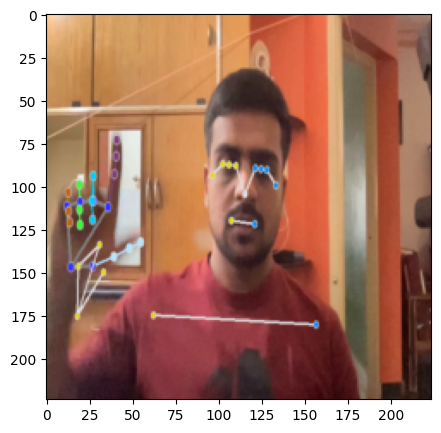

In [ ]:
plt.imshow(sample_video[15])

In [ ]:
predicted_label = []
for batch in tqdm(prod_dl):
  #print(batch['pixel_values'].shape)
  outputs = model_pretrained(**batch)
  logits = outputs.logits
  prod_softmax = torch.nn.functional.softmax(logits, dim=-1)
  predicted_label.append(prod_softmax.argmax(-1))
predicted_label = torch.stack(predicted_label)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
predicted_label

tensor([ 2, 13,  9,  7,  9, 13,  2])

In [ ]:
for val in predicted_label:
  print(idx_to_label[val.item()])

quiet
young
ugly
small
ugly
young
quiet


In [ ]:
for path in prod_video_path:
  print(os.path.basename(path).split('/')[-1])

prod_2_tall.mov
prod_3_sad.mov
prod_1_ugly.mov
prod_4_short.mov
prod_5_tall.mov
prod_6_sad.mov
prod_7_quiet.mov


In [ ]:
idx_to_label

{0: 'new',
 1: 'old',
 2: 'quiet',
 3: 'sad',
 4: 'short',
 5: 'sick',
 6: 'slow',
 7: 'small',
 8: 'tall',
 9: 'ugly',
 10: 'warm',
 11: 'wet',
 12: 'wide',
 13: 'young'}

In [ ]:
#print(classification_report(test_label,predicted_label))

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)

In [ ]:
loss = torch.nn.functional.cross_entropy(input, target)
loss.backward()
print(input)
print(target)
print(loss)

tensor([[ 0.6744,  0.1843, -1.1494,  0.6776, -1.7125],
        [ 0.6602,  1.4167, -0.4237, -2.5425,  0.9023],
        [-1.5461, -0.3835, -0.3021, -0.3967, -0.4671]], requires_grad=True)
tensor([4, 3, 3])
tensor(3.2272, grad_fn=<NllLossBackward0>)


In [ ]:
input_softmax = torch.nn.functional.softmax(input, dim=-1)
loss = torch.nn.functional.cross_entropy(input_softmax, target)
loss.backward()
print(input)
print(input_softmax)
print(target)
print(loss)

tensor([[ 0.6744,  0.1843, -1.1494,  0.6776, -1.7125],
        [ 0.6602,  1.4167, -0.4237, -2.5425,  0.9023],
        [-1.5461, -0.3835, -0.3021, -0.3967, -0.4671]], requires_grad=True)
tensor([[0.3485, 0.2135, 0.0563, 0.3497, 0.0320],
        [0.2090, 0.4454, 0.0707, 0.0085, 0.2663],
        [0.0726, 0.2323, 0.2520, 0.2293, 0.2137]], grad_fn=<SoftmaxBackward0>)
tensor([4, 3, 3])
tensor(1.7273, grad_fn=<NllLossBackward0>)
